## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results_df, mouse_metadata_df, 
                      how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

number_of_mice = combined_df["Mouse ID"].value_counts()
number_of_mice

g989    13
l661    10
a699    10
c757    10
l897    10
        ..
v199     1
l872     1
d133     1
h428     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_df.duplicated(["Mouse ID", "Timepoint"])
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_df.get(duplicates, ("Mouse ID"))


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice

l661    10
t718    10
c757    10
l897    10
e584    10
        ..
v199     1
t573     1
x226     1
d133     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance_tumor = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

standard_var_tumor = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_tutor_volume = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stat_df = pd.DataFrame({"Mean": mean_tumor_volume,
                               "Median": median_tumor_volume,
                               "Variance": variance_tumor,
                               "Standard Deviation": standard_var_tumor,
                               "SEM": sem_tutor_volume})
summary_stat_df 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# This method produces everything in a single groupby function

# summary_stat_2_df = clean_df.groupby("Drug Regimen")
# summary_stat_2_df = summary_stat_2_df["Tumor Volume (mm3)"]
# summary_stat_2_df.describe()

summary_stat_2_df = clean_df.groupby("Drug Regimen")
summary_stat_2_df["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, stats.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

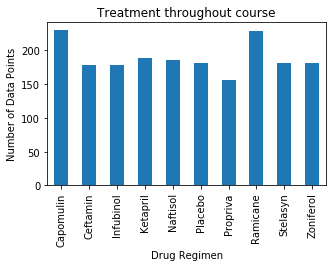

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pandas. 

#set the dataframe to what we want to show
pandas_bar_chart = clean_df.groupby("Drug Regimen").count()
pandas_bar_chart = pandas_bar_chart["Timepoint"]

# Plot chart using pandas 
pandas_bar_chart.plot(kind="bar", figsize=(5,3))

# Add axis and title  
plt.title("Treatment throughout course")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")


In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pyplot.

pyplot_bar_chart_df = clean_df.groupby("Drug Regimen").count()

# pyplot_bar_chart_df = pyplot_bar_chart_df["Timepoint"]

pyplot_bar_chart_df

# x_axis = np.arange(len(pyplot_bar_chart_df))


plt.bar(x_axis, pyplot_bar_chart_df["Timepoint"], align='center')

# tick_locations = [value for value in x_axis]

# plt.xticks(tick_locations, pyplot_bar_chart_df["Drug Regimen"], rotation="vertical")

# plt.tight_layout()

KeyError: 'Drug Regimen'

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
